## ΠΑΝΕΠΙΣΤΗΜΙΟ ΠΕΙΡΑΙΩΣ
Τμήμα Πληροφορικής
Εργασία Μαθήματος: Ευφυής Αλληλεπίδραση με Κοινωνικά Δίκτυα

Για την συγγραφή κώδικα χρησιμοποιήθηκαν οι βιβλιοθήκες networkx, matplotlib, numpy, pandas

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import zeros

In [2]:
# Εισαγωγή Δεδομένων
stackoverflow_data = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None, names=["source_id", "target_id", "timestamp"])
stackoverflow_data.head(5)

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [3]:
# Δημιουργία μικρότερου dataset λόγω μεγάλου όγκου αρχείου
dataset = stackoverflow_data.iloc[:1000]

In [4]:
# Αρχικά ο χρήστης εισάγει την παράμετρο Ν και έπειτα 'εχουμε τον υπολογισμός 
# των χρονικών στιγμών t_min, t_max ( μέγιστο και το ελάχιστο timestamp), ΔΤ και δτ
N = int(input('Εισάγεται τον αριθμό Ν:')) # User Input

# Ερώτημα 1
t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

print('Ελάχιστο Timestamp = ', t_min, 'Ημερομηνία: ', pd.to_datetime(t_min, unit='s'))
print('Μέγιστο Timestamp = ', t_max, 'Ημερομηνία: ', pd.to_datetime(t_max, unit='s'))
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)


Εισάγεται τον αριθμό Ν:4
Ελάχιστο Timestamp =  1217567877 Ημερομηνία:  2008-08-01 05:17:57
Μέγιστο Timestamp =  1218036494 Ημερομηνία:  2008-08-06 15:28:14
DT =  468617
χρονική διάρκεια:  117154.25


In [6]:
# Διαμέριση του συνολικού χρονικού διαστήματος
# Ερώτημα 2
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        
        # Αρχική τιμή του χρονικού διαστήματος
        tj = t_min + j * dt
        
        # Τελική τιμή του χρονικού διαστήματος
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

time_intervals = create_intervals(dataset,N)

print('Χρονικά διαστήματα: ', time_intervals)

Χρονικά διαστήματα:  [[1217567877, 1217685031], [1217685031, 1217802185], [1217802185, 1217919339], [1217919339, 1218036494]]


In [7]:
# Η συνάρτηση graph παίρνει ως όρισμα μια χρονική στιγμή (time_interval).
# Δημιουργή ένα κενό κατευθυνόμενο γράφημα και προσθέτει μία ακμή μονο όταν το timestamp 
# ανήκει στο υποσύνολο του χρόνου για το οποίο έχει κληθεί η συνάρτηση 
# Τέλος γίνεται γραφική αναπαράσταση του γραφήματος και η συνάρτηση καλεί την centrality_plots.

# Ερώτημα 3
def graph(time_interval):
    min_time, max_time = time_interval
    g = nx.DiGraph()
    df_indexes=[]
    index=0
    while index < len(dataset):
        if min_time <= dataset.timestamp[index] < max_time \
            or ( ( max_time == N-1 and min_time <= dataset.timestamp[index] <= max_time)) \
            and dataset.source_id[index] != dataset.target_id[index]:
            g.add_edge(dataset.source_id[index], dataset.target_id[index])
            df_indexes.append(index) 
        index += 1
    nx.draw_networkx(g, node_size=150, font_size=10)
    plt.show()
    centrality_plots(g)


In [8]:
# Η συνάρτηση καλείται από την συνάρτηση graph και είναι υπεύθυνη για τον υπολογισμό και
# την γραφική απεικόνιση των μέτρων κεντρικότητας των γραφημάτων. 

# Ερώτημα 4
def centrality_plots(G):
    
    # Υπολογισμός degree centrality:
    degree_centrality = nx.degree_centrality(G)
    # Υπολογισμός in degree centrality:
    in_degree_centrality = nx.in_degree_centrality(G)
    # Υπολογισμός Out Degree Centrality:
    out_degree_centrality = nx.out_degree_centrality(G)
    # Υπολογισμός closeness Centrality: 
    closeness_centrality = nx.closeness_centrality(G)
    # Υπολογισμός Betweenness Centrality: 
    betweenness_centrality = nx.betweenness_centrality(G)
    # Υπολογισμός Eigenvector Centrality: 
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    # Υπολογισμός Katz Centrality: 
    katz_centrality = nx.katz_centrality_numpy(G)

    # Plots 
    fig, axs = plt.subplots(3, 3, figsize=(15,15))

    # γραφική απεικόνιση degree centrality distribution.
    degree_centrality_values = np.asarray(list(degree_centrality.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(degree_centrality_values)
    
    # γραφική απεικόνιση in degree centrality distribution.
    in_degree_centrality_values = np.asarray(list(in_degree_centrality.values())) 
    axs[0][1].set_title('in degree centrality')
    axs[0][1].hist(in_degree_centrality_values)
    
    # γραφική απεικόνιση out degree centrality distribution.
    out_degree_centrality_values = np.asarray(list(out_degree_centrality.values())) 
    axs[0][2].set_title('out degree centrality')
    axs[0][2].hist(out_degree_centrality_values)
    
    # γραφική απεικόνιση closeness Centrality distribution.
    closeness_centrality_values = np.asarray(list(closeness_centrality.values())) 
    axs[1][0].set_title('Closeness Centrality')
    axs[1][0].hist(closeness_centrality_values)

    # γραφική απεικόνιση Betweenness Centrality distribution.
    betweenness_centrality_values = np.asarray(list(betweenness_centrality.values())) 
    axs[1][1].set_title('Betweenness Centrality')
    axs[1][1].hist(betweenness_centrality_values)

    # γραφική απεικόνιση Eigenvector Centrality distribution.
    eigenvector_centrality_value = np.asarray(list(eigenvector_centrality.values())) 
    axs[1][2].set_title('Eigenvector Centrality')
    axs[1][2].hist(eigenvector_centrality_value)

    # γραφική απεικόνιση Katz Centrality distribution.
    katz_centrality_values = np.asarray(list(katz_centrality.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].hist(katz_centrality_values)
    
    plt.show()

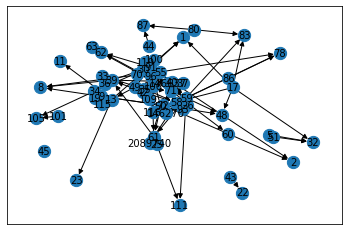

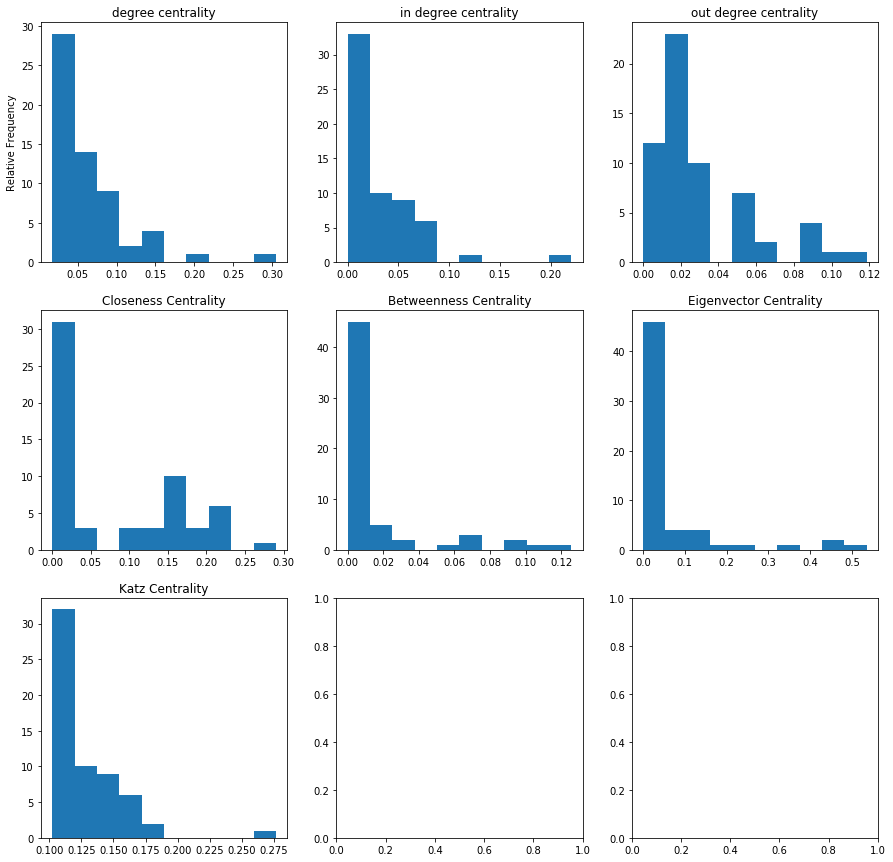

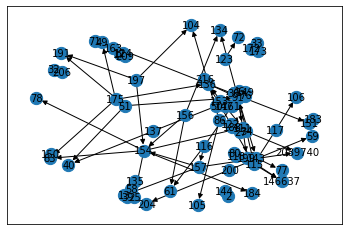

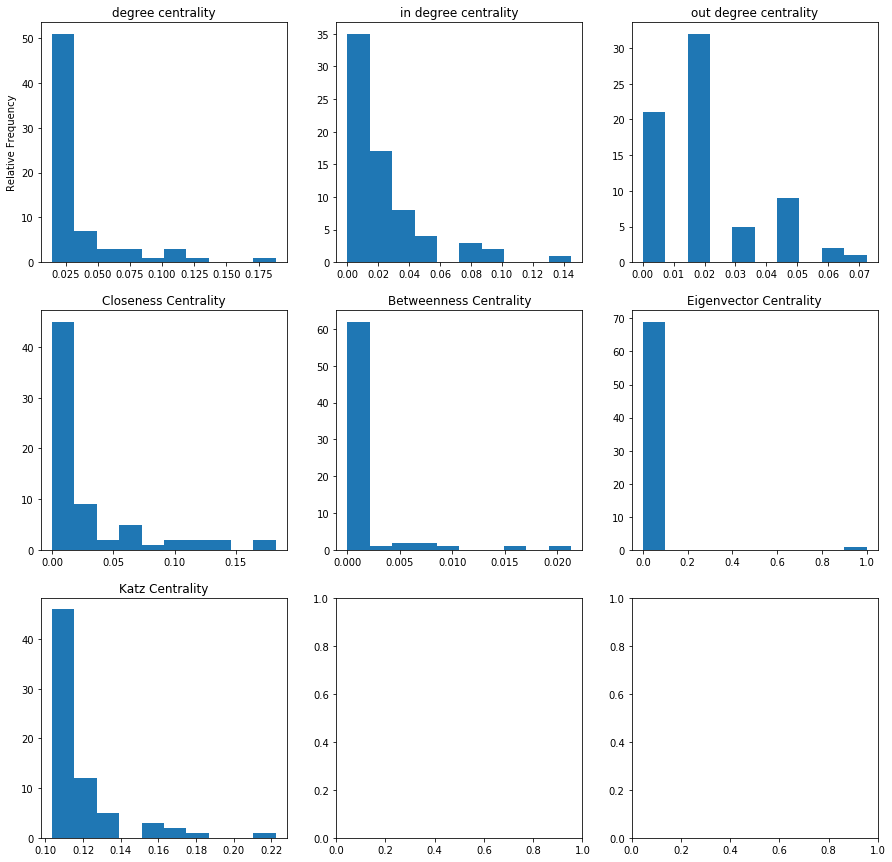

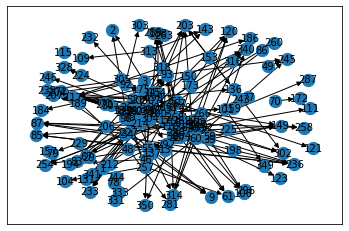

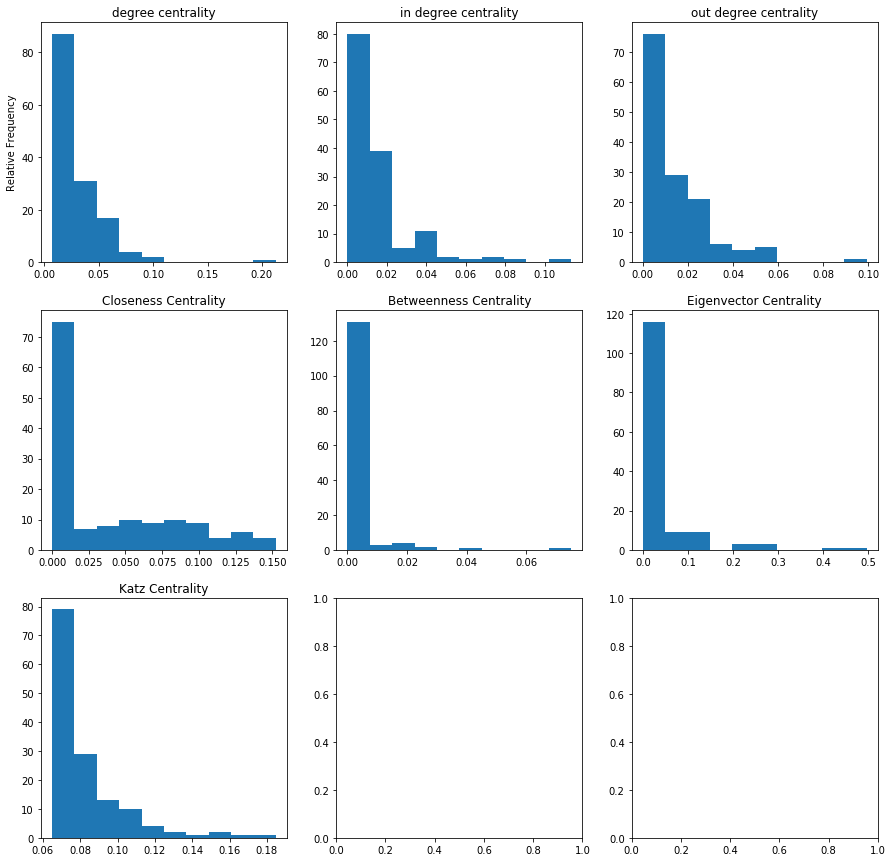

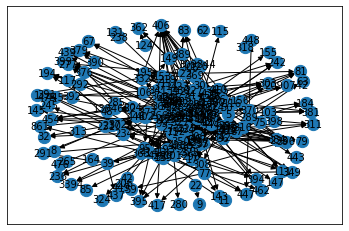

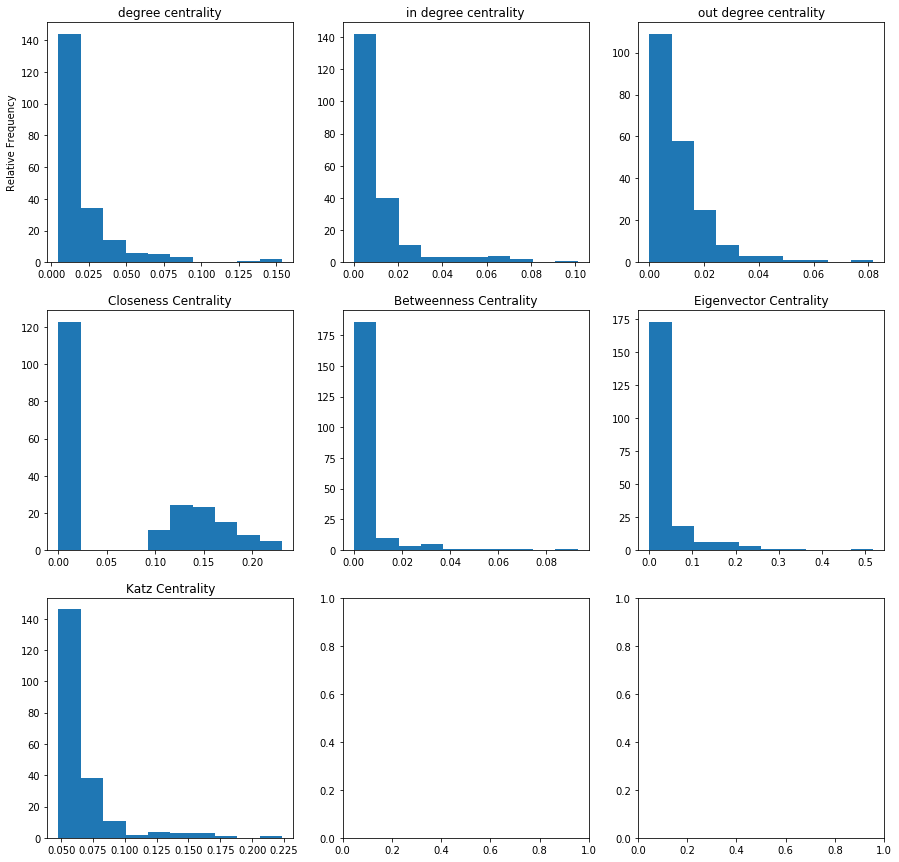

In [9]:
# Εκτέλεση της συνάρτησης graph για κάθε N
for i in range(N):
    graph(time_intervals[i])

In [159]:
# Η συνάρτηση calculate_v_e υπολογίζει τα σύνολα 𝑉∗[𝑡𝑗−1,𝑡𝑗+1], 𝐸∗[𝑡𝑗−1,𝑡𝑗] και 𝐸∗[𝑡𝑗,𝑡𝑗+1].
# Η συνάρτηση αρχικά δημιουργεί δύο κατευθυνόμενα γραφήματα που αντιστοιχούν στα υποδίκτυα (𝐺[𝑡𝑗−1,𝑡𝑗], 𝐺[𝑡𝑗,𝑡𝑗+1]). 
# Στη συνέχεια συγκρίνεται κάθε κόμβος του πρώτου γραφήματος με του δεύτερου και στην περίπτωση 
# που είναι ίδιοι τότε προστίθεται στο σύνολο V*.
# Για κάθε ακμή σε καθένα από τα υποδίκτυα (𝐺[𝑡𝑗−1,𝑡𝑗], 𝐺[𝑡𝑗,𝑡𝑗+1]) ελέγχεται αν και οι δύο της κόμβοι βρίσκονται στο σύνολο V*. 
# Σε αυτή την περίπτωση η ακμή προστίθεται στο σύνολο 𝐸∗[𝑡𝑗−1,𝑡𝑗] ή
# 𝐸∗[𝑡𝑗,𝑡𝑗+1] ανάλογα με το από πού προήλθε η ακμή και τέλοςτυπώνονται 
# νέα τρία σύνολα και καλείται η συνάρτηση graph_matrix.

def calculate_v_e(): # Finds V* and E*
    t=0
    while t < N - 1:
        g1 = nx.DiGraph()
        g2 = nx.DiGraph()
        for index in range(len(dataset)):
            if time_intervals[t][0] <= dataset.timestamp[index] < time_intervals[t][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g1.add_edge(dataset.source_id[index], dataset.target_id[index])
            elif time_intervals[t + 1][0] <= dataset.timestamp[index] < time_intervals[t + 1][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g2.add_edge(dataset.source_id[index], dataset.target_id[index])
        v = []
        e1 = []
        e2 = []
        
        for i in g1.nodes: 
            for j in g2.nodes:
                if i == j:
                    v.append(i)
                    break
                    
        for i in g1.edges:
            found1 = False
            found2 = False
            for j in v:
                if i[0] == j:
                    found1 = True
                elif i[1] == j:
                    found2 = True
            if found1 and found2:
                e1.append(i)
                
        for i in g2.edges:
            found1 = False
            found2 = False
            for j in v:
                if i[0] == j:
                    found1 = True
                elif i[1] == j:
                    found2 = True
            if found1 and found2:
                e2.append(i)
                
        print('t =', t)
        print('V*[t_', t, ',', 't_', t + 2, '} = ', v)
        print('E*[t_', t, ',', 't_', t + 1, '] =', e1)
        print('E*[t_', t + 1, ',', 't_', t + 2, '] =', e2)
        
        if graph_matrix(e1, v) == -1:
            return -1
        t += 1

        

def graph_matrix(e1, v):  # Calculates the similarity matrices
    if len(v) == 0:
        print('V* is empty.')
        return -1
    g = nx.DiGraph()
    g.add_edges_from(e1)
    ung = nx.Graph(g)

    shortest_path = zeros((len(v), len(v)))
    common_neigbors = zeros((len(v), len(v)))
    jaccard_distance = zeros((len(v), len(v)))
    adamic_adar = zeros((len(v), len(v)))
    preferential_attachment = zeros((len(v), len(v)))
    for i in range(len(v)):
        for j in range(len(v)):
            try:
                shortest_path[i][j] = nx.shortest_path_length(g, v[i], v[j])
            except nx.NetworkXNoPath:
                shortest_path[i][j] = -1
                pass
            except nx.NodeNotFound:
                shortest_path[i][j] = -1
                pass
            try:
                common_neigbors[i][j] = len(sorted(nx.common_neighbors(ung, v[i], v[j])))
            except nx.NetworkXError:
                common_neigbors[i][j] = -1
                pass
            try:
                for u, v, p in nx.jaccard_coefficient(ung):
                    jaccard_distance[i][j] = p
            except:
                jaccard_distance[i][j] = -1
                pass
             try:
                for u, v, p in nx.adamic_adar_index(ung, [(v[i][i], v[j][j])]):
                    adamic_adar[i][j] = p
            except:
                adamic_adar[i][j] = -1
                pass
            try:
                for u, v, p in nx.preferential_attachment(ung, [(v[i][i], v[j][j])]):
                    preferential_attachment[i][j] = p
            except:
                preferential_attachment[i][j] = -1
                pass
    ####
    print("jaccard_distance", jaccard_distance)
        
 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 90)

In [160]:
calculate_v_e()
    

t = 0
V*[t_ 0 , t_ 2 } =  [9, 13, 1, 2, 33, 39, 32, 40, 49, 55, 51, 60, 61, 58, 25, 59, 2089740, 34, 78, 86, 146637, 30, 87, 83, 91, 93, 96, 105, 101, 111, 116, 115, 117, 122, 134, 136, 137, 147, 143, 77, 150]
E*[t_ 0 , t_ 1 ] = [(13, 1), (33, 39), (39, 33), (39, 40), (39, 91), (40, 59), (40, 146637), (40, 91), (49, 13), (49, 91), (55, 78), (55, 146637), (55, 91), (51, 32), (60, 2), (61, 58), (61, 39), (61, 111), (58, 59), (25, 61), (59, 78), (59, 30), (59, 83), (59, 61), (59, 111), (2089740, 61), (34, 39), (34, 91), (34, 105), (86, 58), (86, 78), (146637, 30), (146637, 59), (30, 91), (91, 1), (91, 134), (93, 58), (96, 91), (101, 105), (116, 61), (115, 9), (115, 146637), (122, 115), (136, 49), (136, 91), (137, 91), (137, 40), (147, 111), (147, 136), (143, 77), (150, 83)]
E*[t_ 1 , t_ 2 ] = [(111, 91), (86, 2089740), (86, 105), (13, 25), (58, 25), (39, 25), (39, 93), (91, 143), (91, 111), (91, 93), (91, 58), (34, 91), (34, 115), (34, 111), (34, 93), (34, 58), (34, 25), (116, 91), (116, 